In [215]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 20})
import pandas as pd
from virgodb import VirgoDB
vdb = VirgoDB("giorgio",password="BN401kmd")
import timeit

-- Select all progenitors of a particular galaxy


select *

from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des

where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid

In [83]:
s1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass,prog.type,prog.mdhalo,prog.z,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid,prog.DescendantID,prog.LastProgenitorID,prog.DHaloID "

s2 = "from Gonzalez2014a..mr7 as prog "
s3 = "where prog.galaxyid = 0 and prog.galaxyid between prog.galaxyid and prog.lastprogenitorid"

s = s1 + s2 + s3
###################################
#This one seems to work
###################################
ss_1 = s1
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid"

ss= ss_1 + ss_2 + ss_3

data = vdb.execute_query(ss)

#vdb.execute_query("select * from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid")

In [92]:
data['DHaloID'],data['LastProgenitorID'],data['mdhalo']

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49, 44, 44, 44, 44, 44, 44, 44, 44, 44, 49, 49, 49, 49, 49]),
 array([45.515327 , 45.51487  , 45.514416 , 45.513958 , 45.513504 ,
        45.51305  , 45.512592 , 45.51214  , 45.51168  , 45.511227 ,
        45.510773 , 45.510315 , 42.606804 , 42.60638  , 42.605953 ,
        39.984447 , 39.984047 , 38.58023  , 38.579845 , 38.579456 ,
        37.831097 , 37.83072  , 37.83034  , 36.332836 , 36.332474 ,
        36.33211  , 32.025017 , 32.024693 , 30.151905 , 28.279398 ,
        28.279116 , 27.249083 , 24.720818 , 21.162727 , 21.162518 ,
        19.009    , 19.00881  , 15.825068 ,  9.925783 ,  7.3975906,
         7.397517 ,  6.8356805,  5.337449 ,  3.4646597

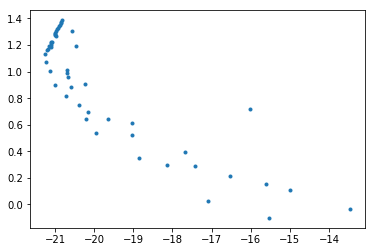

In [18]:
plt.plot(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],".")

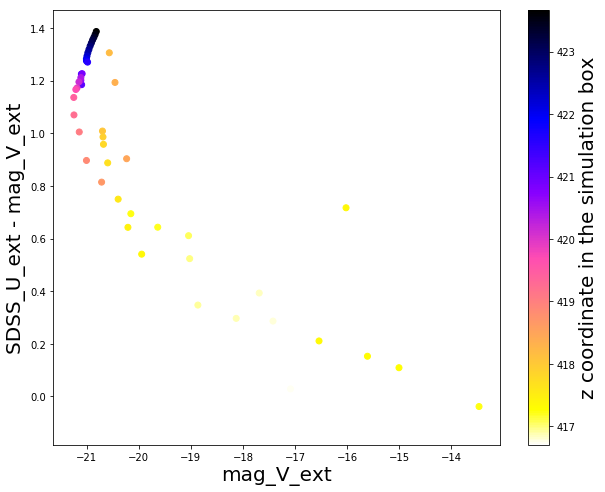

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['z'],cmap='gnuplot2_r')
plt.colorbar(label='z coordinate in the simulation box')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.show()

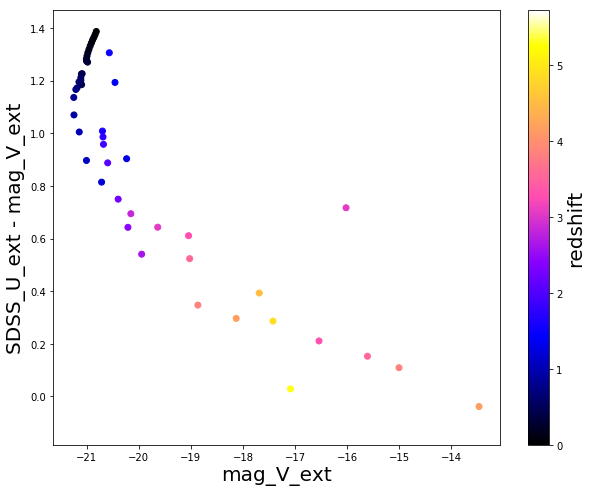

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_evolution.png')
plt.show()

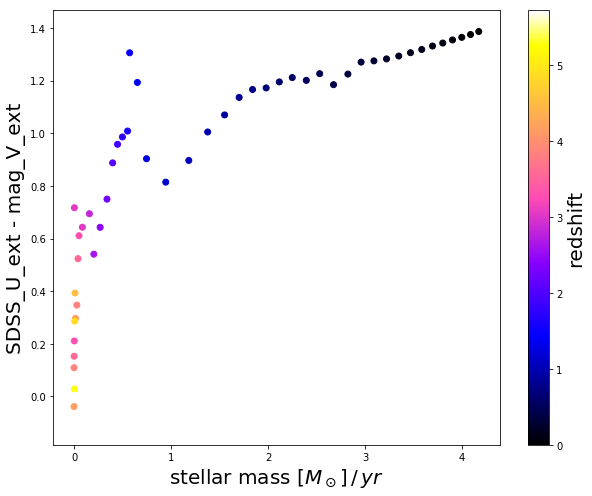

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(data['stellarmass'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel(r"stellar mass $[M_\odot]\,/\,yr$")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmass_progenitor_evolution.png')
plt.show()

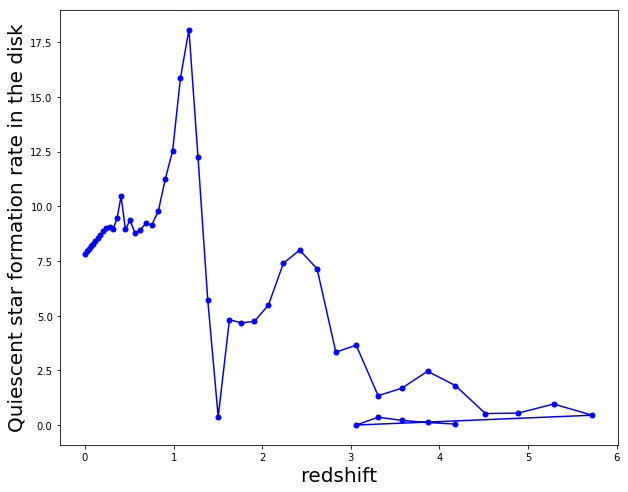

In [53]:
plt.figure(figsize=(10,8))
plt.plot(data['redshift'],data['sfr'],color='b')
plt.plot(data['redshift'],data['sfr'],'.',markersize=10,color='b')
plt.xlabel(r"redshift")
plt.ylabel("Quiescent star formation rate in the disk")
plt.savefig('../plots/005/SFH_progenitor_quiescent.png')
plt.show()

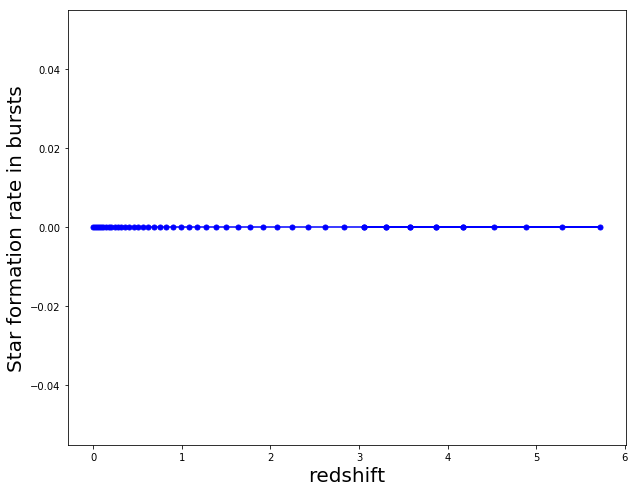

In [40]:
plt.figure(figsize=(10,8))
plt.plot(data['redshift'],data['sfrbulge'],color='b')
plt.plot(data['redshift'],data['sfrbulge'],'.',markersize=10,color='b')
plt.xlabel(r"redshift")
plt.ylabel("Star formation rate in bursts")
plt.savefig('../plots/005/SFH_progenitor_bursts.png')
plt.show()

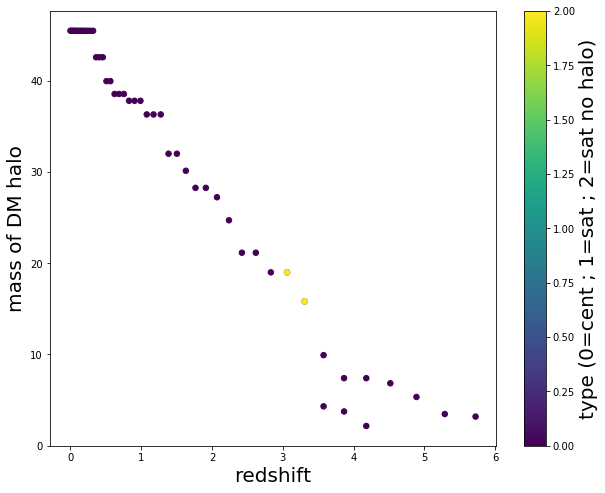

In [50]:
plt.figure(figsize=(10,8))
#plt.plot(data['redshift'],data['mdhalo'],color='b')
plt.scatter(data['redshift'],data['mdhalo'],s=30,c=data['type'])
plt.xlabel(r"redshift")
plt.ylabel("mass of DM halo")
plt.colorbar(label='type (0=cent ; 1=sat ; 2=sat no halo)')
plt.savefig('../plots/005/mdhalo_progenitor.png')
plt.show()

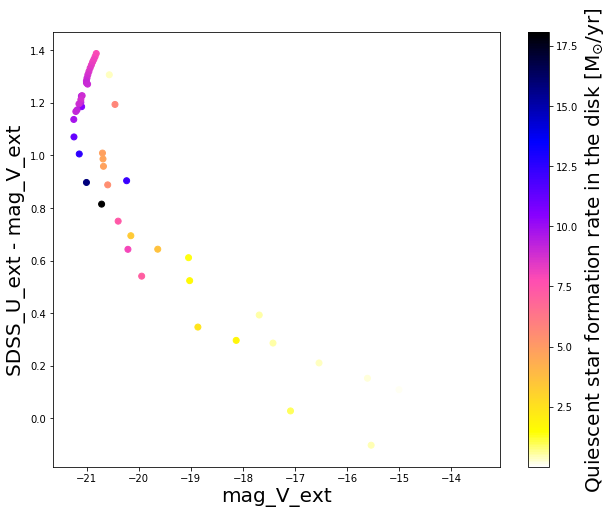

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['sfr'],cmap='gnuplot2_r')
plt.colorbar(label=r'Quiescent star formation rate in the disk [M$_{\odot}/\rm{yr}$]')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_sfr.png')
plt.show()

(array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]),
 array([ 0.  ,  0.49,  0.98,  1.47,  1.96,  2.45,  2.94,  3.43,  3.92,
         4.41,  4.9 ,  5.39,  5.88,  6.37,  6.86,  7.35,  7.84,  8.33,
         8.82,  9.31,  9.8 , 10.29, 10.78, 11.27, 11.76, 12.25, 12.74,
        13.23, 13.72, 14.21, 14.7 , 15.19, 15.68, 16.17, 16.66, 17.15,
        17.64, 18.13, 18.62, 19.11, 19.6 , 20.09, 20.58, 21.07, 21.56,
        22.05, 22.54, 23.03, 23.52, 24.01, 24.5 , 24.99, 25.48, 25.97,
        26.46, 26.95, 27.44, 27.93, 28.42, 28.91, 29.4 , 29.89, 30.38,
        30.87, 31.36, 31.85, 32.34, 32.83, 33.32, 33.

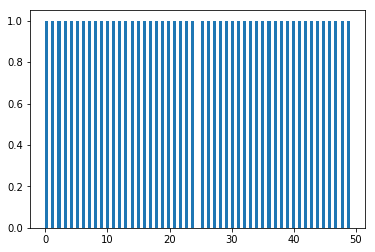

In [82]:
plt.hist(data['galaxyid'],bins=100)

In [89]:
############# Change galaxyid

ss_1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass,prog.type,prog.mdhalo,prog.z,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid ,prog.DHaloID "
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 30 and prog.galaxyid between des.galaxyid and des.lastprogenitorid"

ss= ss_1 + ss_2 + ss_3

data_30 = vdb.execute_query(ss)

In [90]:
data_30['DHaloID']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

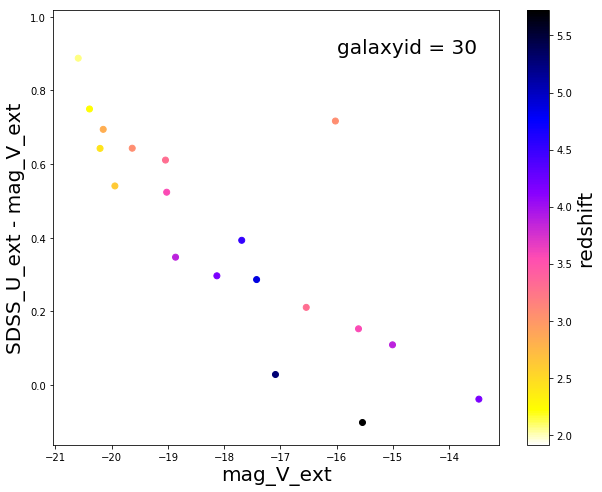

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(data_30['mag_V_ext'],data_30['SDSS_u_ext']-data_30['mag_V_ext'],c=data_30['redshift'],cmap='gnuplot2_r')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.text(-16.,0.9,'galaxyid = 30')
plt.savefig('../plots/005/colmag_progenitor_evolution_30.png')
plt.show()

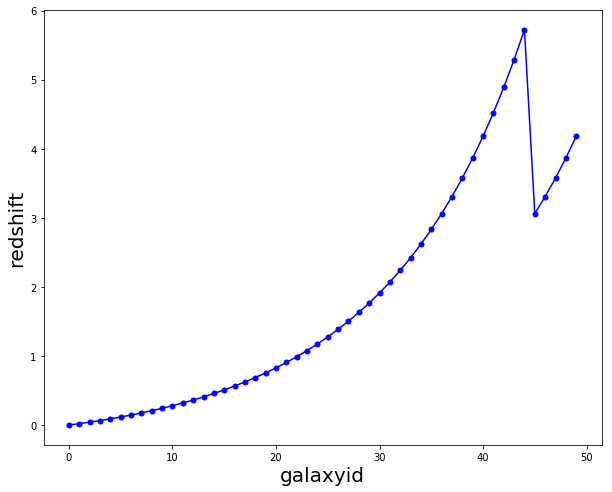

In [77]:
plt.figure(figsize=(10,8))
plt.plot(data['galaxyid'],data['redshift'],c='b')
plt.plot(data['galaxyid'],data['redshift'],'.',markersize=10,c='b')
plt.xlabel('galaxyid')
plt.ylabel('redshift')
plt.savefig('../plots/005/galaxyid_redshift.png')
plt.show()

In [81]:
len(data['galaxyid'][np.where(data['galaxyid']==2)])

1

In [97]:
s1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass,prog.type,prog.mdhalo,prog.z,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid,prog.DescendantID,prog.LastProgenitorID,prog.DHaloID,prog.snapnum "

s2 = "from Gonzalez2014a..mr7 as prog "
s3 = "where prog.galaxyid = 0 and prog.galaxyid between prog.galaxyid and prog.lastprogenitorid"

s = s1 + s2 + s3
###################################
#This one seems to work
###################################
ss_1 = s1
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.MainLeafID"

ss= ss_1 + ss_2 + ss_3

data_ = vdb.execute_query(ss)

#vdb.execute_query("select * from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid")

In [99]:
data_['galaxyid']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

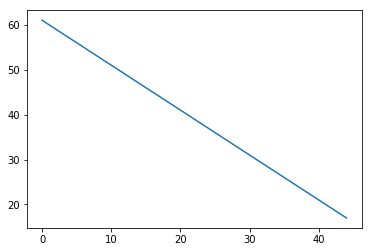

In [100]:
plt.plot(data_['galaxyid'],data_['snapnum'])

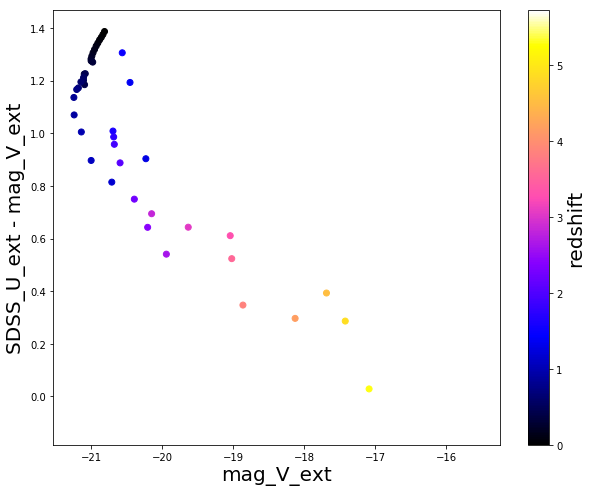

In [101]:
plt.figure(figsize=(10,8))
plt.scatter(data_['mag_V_ext'],data_['SDSS_u_ext']-data_['mag_V_ext'],c=data_['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_evolution.png')
plt.show()

# Just follow the main progenitor

Until now the query was between the galaxyid and the LastProgenitorID but this include all the galaxy who contribute to the merger tree. Instead what I want is just the evolution of the main progenitor and that can be obtained doin the query between GalaxyID and MainLeafID.

In [131]:
############# Evolution of main progenitor

ss_1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass, prog.type,prog.mdhalo,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid ,prog.DHaloID, prog.mainleafid, prog.lastprogenitorid "
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.mainleafid"

ss= ss_1 + ss_2 + ss_3

Leaf = vdb.execute_query(ss)

In [132]:
Leaf.dtype.names

(u'mag_V_ext',
 u'SDSS_u_ext',
 u'SDSS_i_obs_ext',
 u'stellarmass',
 u'type',
 u'mdhalo',
 u'redshift',
 u'sfr',
 u'sfrbulge',
 u'galaxyid',
 u'DHaloID',
 u'mainleafid',
 u'lastprogenitorid')

In [133]:
Leaf['galaxyid']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [134]:
Leaf['mainleafid']

array([44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44])

In [135]:
Leaf['lastprogenitorid']

array([49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 44, 44, 44, 44, 44, 44, 44, 44, 44])

In [136]:
Leaf['redshift']

array([0.        , 0.01993251, 0.04140306, 0.06449342, 0.08928776,
       0.11588299, 0.14438295, 0.17489803, 0.20754898, 0.24246883,
       0.27980196, 0.31970298, 0.36233997, 0.40789902, 0.45657718,
       0.50859094, 0.56417704, 0.6235901 , 0.687109  , 0.755036  ,
       0.82769895, 0.905462  , 0.988708  , 1.0778699 , 1.17342   ,
       1.27585   , 1.3857203 , 1.5036402 , 1.63027   , 1.76634   ,
       1.9126298 , 2.07003   , 2.2394903 , 2.4220402 , 2.61886   ,
       2.8311799 , 3.06042   , 3.3080997 , 3.57591   , 3.8656797 ,
       4.1794705 , 4.51956   , 4.8884506 , 5.2888303 , 5.7238603 ],
      dtype=float32)

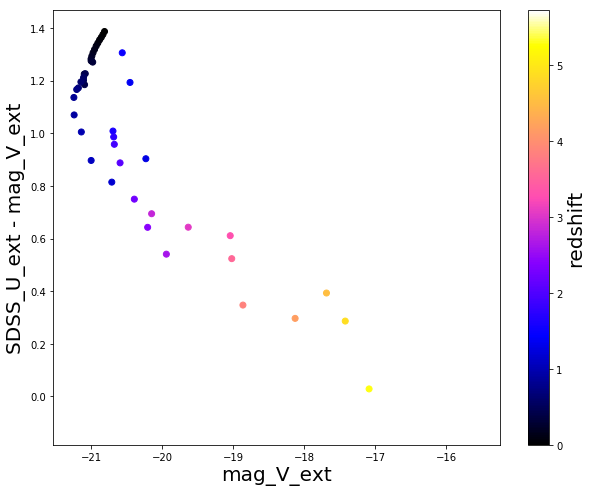

In [148]:
plt.figure(figsize=(10,8))
plt.scatter(Leaf['mag_V_ext'],Leaf['SDSS_u_ext']-Leaf['mag_V_ext'],c=Leaf['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_evolution.png')
plt.show()

In [138]:
z05 = np.where(Leaf['redshift']<0.5)

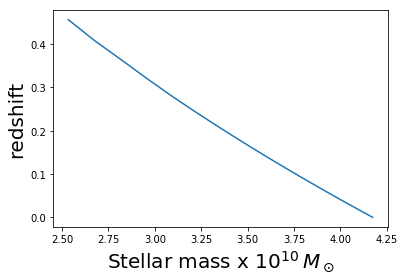

In [143]:
plt.plot(Leaf['stellarmass'][z05],Leaf['redshift'][z05])
plt.xlabel(r'Stellar mass x $10^{10} \, M_\odot$')
plt.ylabel('redshift')
plt.show()

In [147]:
for i in z05[0]:
    #print z05[0][i]
    print Leaf['redshift'][np.where(Leaf['galaxyid']==z05[0][i])], Leaf['stellarmass'][np.where(Leaf['galaxyid']==z05[0][i])]

[0.]
[0.01993251]
[0.04140306]
[0.06449342]
[0.08928776]
[0.11588299]
[0.14438295]
[0.17489803]
[0.20754898]
[0.24246883]
[0.27980196]
[0.31970298]
[0.36233997]
[0.40789902]
[0.45657718]


# Carlton plot: Stellar-mass(z=0) vs redshift(MainLeafID)

In [184]:
############# Galaxies in SnapShot at z=0

ss_1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass, prog.type,prog.mdhalo,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid ,prog.DHaloID, prog.mainleafid, prog.lastprogenitorid ,prog.random "
#ss_1 = "select count * "
ss_2 = "from Gonzalez2014a..mr7 as prog " #, Gonzalez2014a..mr7 as des "
ss_3 = "where prog.snapnum=60 and prog.random<0.0001"

ss= ss_1 + ss_2 + ss_3

today = vdb.execute_query(ss)

In [186]:
len(today['random'])

3072

In [194]:
today.dtype.names

(u'mag_V_ext',
 u'SDSS_u_ext',
 u'SDSS_i_obs_ext',
 u'stellarmass',
 u'type',
 u'mdhalo',
 u'redshift',
 u'sfr',
 u'sfrbulge',
 u'galaxyid',
 u'DHaloID',
 u'mainleafid',
 u'lastprogenitorid',
 u'random')

In [187]:
def get_redshift(all_ids,all_reds,galaxy_id):
    output_redshift = np.nan
    for i in range(len(all_ids)):
        if all_ids[i]==galaxy_id:
            output_redshift = all_reds[i]
    return output_redshift
    

In [189]:
today['galaxyid'],today['redshift']

(array([ 1500018420000001,  1500037920000001,  1500086130000001, ...,
        49400021960000001, 49400028960000001, 50200562310000001]),
 array([0.01993251, 0.01993251, 0.01993251, ..., 0.01993251, 0.01993251,
        0.01993251], dtype=float32))

In [191]:
get_redshift(today['galaxyid'],today['redshift'],1500018420000001)

0.019932508

In [270]:
def getRedshift_DB1(id_gal):
    query = 'select redshift from Gonzalez2014a..mr7 where galaxyid='+str(id_gal)
    return vdb.execute_query(query)[0][0]

In [271]:
today['mainleafid']

array([ 1500018420000035,  1500037920000046,  1500086130000041, ...,
       49400021960000026, 49400028960000038, 50200562310000013])

In [276]:
start = timeit.timeit()
zp = getRedshift_DB1(today['mainleafid'][0])
end = timeit.timeit()
print "delta time = ",end-start
print zp

delta time =  -0.000664949417114
2.8311799


In [274]:
len(today)

3072

In [277]:
start = timeit.timeit()
z_prog = np.zeros(len(today))
for i in range(len(today)):
    z_prog[i] = getRedshift_DB1(today['mainleafid'][i])
end = timeit.timeit()
print "delta time = ",end-start
print z_prog

delta time =  -0.000221014022827
[2.83117986 6.71159029 4.51955986 ... 1.38572025 3.57591009 0.40789902]


In [278]:
z_prog

array([2.83117986, 6.71159029, 4.51955986, ..., 1.38572025, 3.57591009,
       0.40789902])

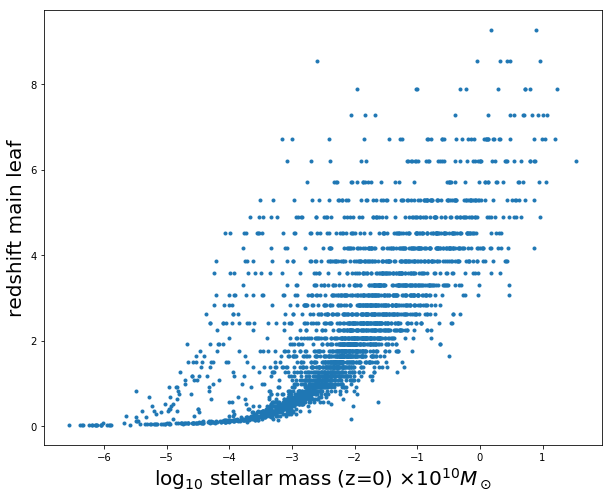

In [306]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(today['stellarmass']),z_prog,".")
plt.xlabel(r'log$_{10}$ stellar mass (z=0) $\times 10^{10} M_\odot$')
plt.ylabel('redshift main leaf')
plt.savefig('../plots/005/progenitor_z_mass.png')
plt.show()

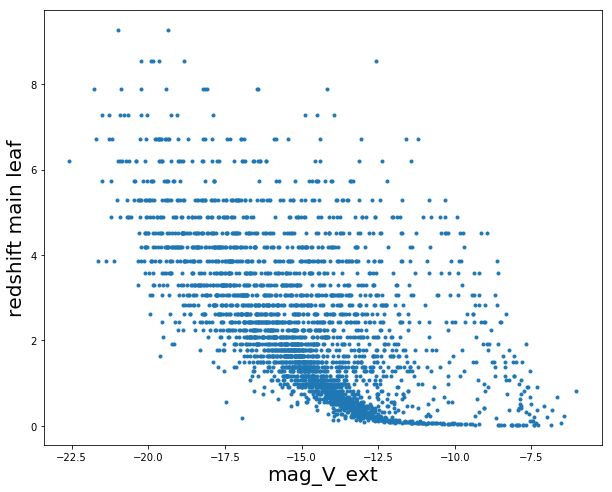

In [307]:
plt.figure(figsize=(10,8))
plt.plot(today['mag_V_ext'],z_prog,".")
plt.xlabel(r'mag_V_ext')
plt.ylabel('redshift main leaf')
plt.savefig('../plots/005/progenitor_z_magV.png')
plt.show()

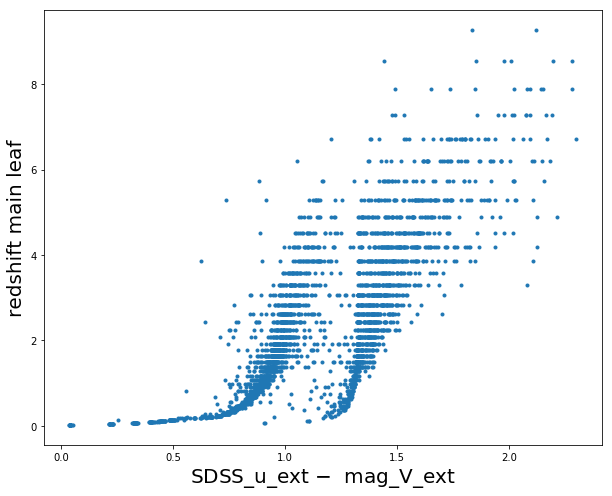

In [323]:
plt.figure(figsize=(10,8))
plt.plot(today['SDSS_u_ext']-today['mag_V_ext'],z_prog,".")
plt.xlabel(r'SDSS_u_ext $-$  mag_V_ext')
plt.ylabel('redshift main leaf')
plt.savefig('../plots/005/progenitor_z_U_V.png')
plt.show()

## Better to save the data in a text file since the query for the redshift progenitor was very long

In [320]:
#####save in txt (no need to run it again)
#a = list(map(str,today['mainleafid']))
a = today['mainleafid']
#aa = a.astype(str)
b = np.log10(today['stellarmass'])
#bb = b.astype(str)
c = z_prog
#cc = c.astype(str)
mat = [a,b,c]
mat =np.array(mat)
np.savetxt('../data/progenitor_z.txt',mat.T,encoding='utf-8',header='MainLeafID \t log10(stellarmass)(z=0) \t MainLeaf redshift')

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 8.000e+00,
        3.000e+00, 1.600e+01, 2.700e+01, 2.500e+01, 5.200e+01, 7.300e+01,
        1.210e+02, 2.060e+02, 2.960e+02, 4.530e+02, 6.810e+02, 1.103e+03]),
 array([10.87800447, 11.07235183, 11.26669919, 11.46104655, 11.65539391,
        11.84974127, 12.04408863, 12.23843599, 12.43278334, 12.6271307 ,
        12.82147806, 13.01582542, 13.21017278, 13.40452014, 13.5988675 ,
        13.79321486, 13.98756222, 14.18190958, 14.37625694, 14.5706043 ,
        14.76495166, 14.95929901, 15.15364637, 15.34799373, 15.54234109,
        15.73668845, 15.93103581, 16.12538317, 16.31973053, 16.51407789,
        16.70842525]),
 <a list of 30 Patch objects>)

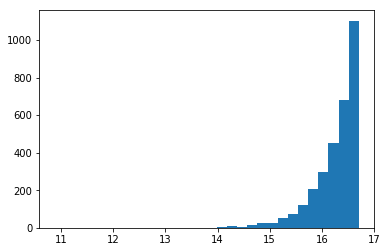

In [223]:
plt.hist(np.log10(today['mainleafid']),bins=30)

In [268]:
q = 'select redshift from Gonzalez2014a..mr7 where galaxyid='+str(today['mainleafid'][0])+" or galaxyid="+str(today['mainleafid'][1])
trial = vdb.execute_query(q)

In [258]:
def build_query():
    q1 = 'select redshift from Gonzalez2014a..mr7 where '
    for i in range(len(today[100])):
        q1 = q1 +' galaxyid='+str(today['mainleafid'][i])+' or '
    q1 = q1[0:-3]
    return q1

In [267]:
query = build_query()
trial = vdb.execute_query(query)

SyntaxError: can't delete function call (<ipython-input-267-90d1bc407a73>, line 1)

In [263]:
print query

select redshift from Gonzalez2014a..mr7 where  galaxyid=1500018420000035 or  galaxyid=1500037920000046 or  galaxyid=1500086130000041 or  galaxyid=2300345510000034 or  galaxyid=2300270030000036 or  galaxyid=2300258050000038 or  galaxyid=2200333540000037 or  galaxyid=2200266580000036 or  galaxyid=2100424100000021 or  galaxyid=2100350600000033 or  galaxyid=2100318690000032 or  galaxyid=2000393630000030 or  galaxyid=1900498200000022 or  galaxyid=1800533630000011 or  galaxyid=1800465460000028 or  galaxyid=1600554170000016 or  galaxyid=1500578510000004 or  galaxyid=1500546600000020 or  galaxyid=1400120390000012 or  galaxyid=1200005880000034 or  galaxyid=1100603310000010 or  galaxyid=1100597670000008 or  galaxyid=1100124230000036 or  galaxyid=1000064170000043 or  galaxyid=700306540000023 or  galaxyid=600360220000027 or  galaxyid=100078660000027 or  galaxyid=185130000042 or  galaxyid=900178800000041 or  galaxyid=900171030000040 or  galaxyid=800247720000037 or  galaxyid=800179130000043 or  gala

In [269]:
trial

rec.array([(2.8311799,), (6.7115903,)],
          dtype=[(u'redshift', '<f4')])